### Importing the libraries

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [2]:
tf.__version__

'2.8.0'

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [7]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('F:/study matrials/2022/Convolution Neural Network/CNN Projects/CNN Categorical Classification/Intel Image Classification/dataset/seg_train/seg_train/',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 14034 images belonging to 6 classes.


### Preprocessing the Test set

In [8]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('F:/study matrials/2022/Convolution Neural Network/CNN Projects/CNN Categorical Classification/Intel Image Classification/dataset/seg_test/seg_test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 3000 images belonging to 6 classes.


In [9]:
training_set.class_indices

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

## Part 2 - Building the CNN

### Initialising the CNN

In [10]:
cnn = tf.keras.models.Sequential()

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

In [12]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

In [13]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

In [14]:
cnn.add(tf.keras.layers.Flatten())

In [15]:
cnn.add(tf.keras.layers.Dense(units=512, activation='relu'))

In [16]:
cnn.add(tf.keras.layers.Dropout(rate=0.5))

In [17]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [18]:
cnn.add(tf.keras.layers.Dense(units=6, activation='softmax'))

## Part 3 - Training the CNN

### Compiling the CNN

In [19]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [20]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 512)               3

### Training the CNN on the Training set and evaluating it on the Test set

In [21]:
fitted_model = cnn.fit(x = training_set,
                       steps_per_epoch = int(14034/32),
                       epochs = 25,
                       validation_data = test_set,
                       validation_steps = int(3000 /32))

Epoch 1/25
438/438 [==============================] - 733s 2s/step - loss: 1.0563 - accuracy: 0.5896 - val_loss: 0.8280 - val_accuracy: 0.7026
Epoch 2/25
438/438 [==============================] - 161s 368ms/step - loss: 0.8180 - accuracy: 0.6976 - val_loss: 0.7020 - val_accuracy: 0.7413
Epoch 3/25
438/438 [==============================] - 276s 631ms/step - loss: 0.7139 - accuracy: 0.7428 - val_loss: 0.6306 - val_accuracy: 0.7732
Epoch 4/25
438/438 [==============================] - 128s 293ms/step - loss: 0.6627 - accuracy: 0.7642 - val_loss: 0.6554 - val_accuracy: 0.7718
Epoch 5/25
438/438 [==============================] - 130s 297ms/step - loss: 0.6090 - accuracy: 0.7837 - val_loss: 0.5712 - val_accuracy: 0.7940
Epoch 6/25
438/438 [==============================] - 179s 410ms/step - loss: 0.5767 - accuracy: 0.7935 - val_loss: 0.5305 - val_accuracy: 0.8175
Epoch 7/25
438/438 [==============================] - 119s 271ms/step - loss: 0.5520 - accuracy: 0.8048 - val_loss: 0.5420 - va

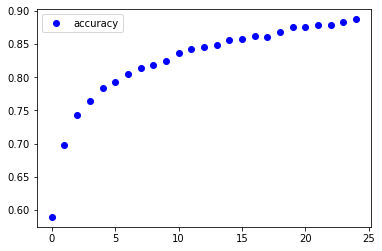

In [22]:
import matplotlib.pyplot as plt
# plotting accuracy and validation accuracy
accuracy = fitted_model.history['accuracy']
plt.plot(range(len(accuracy)), accuracy, 'bo', label = 'accuracy')

plt.legend()

## Part 4 - Making a single prediction

In [32]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('F:/study matrials/2022/Convolution Neural Network/CNN Projects/CNN Categorical Classification/Intel Image Classification/dataset/seg_pred/seg_pred/2798.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
print(result)
training_set.class_indices

[[0. 0. 0. 0. 1. 0.]]


{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}